In [53]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
from sklearn.feature_selection import mutual_info_regression

In [40]:
df = pd.read_csv("nasa_power_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262944 entries, 0 to 262943
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       262944 non-null  object 
 1   wind_speed_10m  262944 non-null  float64
 2   wind_speed_50m  262944 non-null  float64
 3   temperature_2m  262944 non-null  float64
 4   humidity_2m     262944 non-null  float64
 5   pressure        262944 non-null  float64
 6   precipitation   262944 non-null  float64
dtypes: float64(6), object(1)
memory usage: 14.0+ MB


,timestamp,wind_speed_10m,wind_speed_50m,temperature_2m,humidity_2m,pressure,precipitation
0,2019-01-01 00:00:00,1.65,2.09,25.90,87.17,100.84,0.0
1,2019-01-01 01:00:00,1.90,2.97,25.27,87.89,100.79,0.0
2,2019-01-01 02:00:00,2.29,3.78,24.95,85.81,100.78,0.0
3,2019-01-01 03:00:00,2.44,3.78,24.39,85.28,100.82,0.0
4,2019-01-01 04:00:00,2.55,3.79,23.73,85.81,100.89,0.0


In [41]:
# Conversion de la colonne des date
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [42]:
statistique = df.describe()
statistique

,timestamp,wind_speed_10m,wind_speed_50m,temperature_2m,humidity_2m,pressure,precipitation
count,262944,262944.000000,262944.000000,262944.000000,262944.000000,262944.000000,262944.000000
mean,2021-07-01 23:30:00.000000768,3.047987,4.149605,26.607173,85.151812,100.761707,4.191936
min,2019-01-01 00:00:00,0.010000,0.030000,17.810000,33.920000,100.180000,0.000000
25%,2020-04-01 11:45:00,2.440000,3.270000,25.280000,79.550000,100.630000,0.260000
50%,2021-07-01 23:30:00,3.010000,4.270000,26.450000,88.310000,100.760000,1.520000
75%,2022-10-01 11:15:00,3.620000,5.110000,27.870000,92.282500,100.890000,4.630000
max,2023-12-31 23:00:00,8.660000,10.740000,32.520000,100.000000,101.450000,632.290000
std,NaN,1.017904,1.399809,1.915486,9.418031,0.189539,10.090547


- Cette analyse statistique nous montre que les donnée ont été bien enregistré chaque une heure sur une prériode de cinq (05) ans (2019-01-01 à 2023-12-01). Soit 262944 enregistrement.
- Sur cette période, les moyennes respectives de wind_speed_10m, wind_speed_50m, temperature_2m, humidity_2m, pressure,	precipitation sont 3.047987	4.149605	26.607173	85.151812	100.761707	4.191936. En plus la wind_speed_10m, wind_speed_50m, temperature_2m, humidity_2m et pressure ont leur valeurs concentré autour de la moyenne. Ce qui n'est pas le cas pour la précipitation.
- Dans cette période, la plus petite valeur et la plus grande valeur de la vitesse à 50m de haut(depuis le sol) sont respectivement: 0.030000 m/s et 10.740000 m/s.
**Tout ses caractéristiques méteorologique du lieu montre  qu'on peut y installer d'un parc éolienne de modèle E48/800**

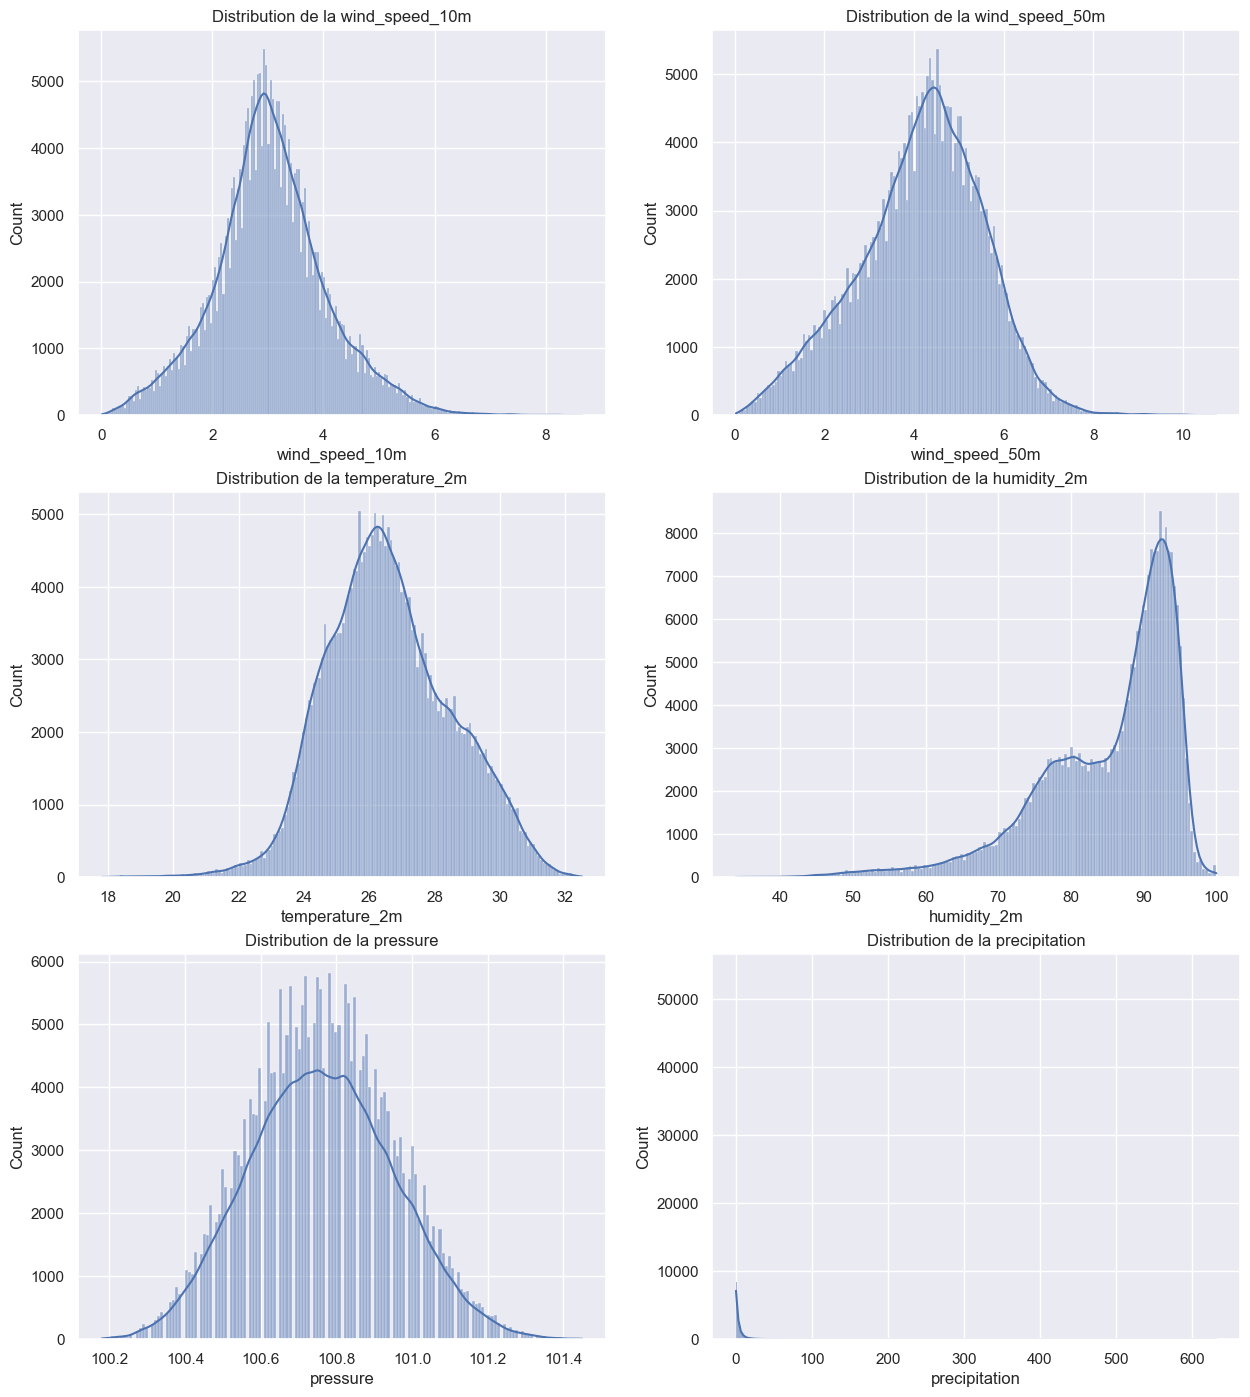

In [ ]:
colonne = df.columns #Récupérer les colonnes

# Distribution des paramètres météorologique
plt.figure(figsize=(15, 35))
for i in range(len(colonne[1:])):
    plt.subplot(len(colonne[1:]), 2, i+1)
    sns.histplot(df[colonne[i+1]],kde=True)
    plt.title(f'Distribution de la {colonne[i+1]}')

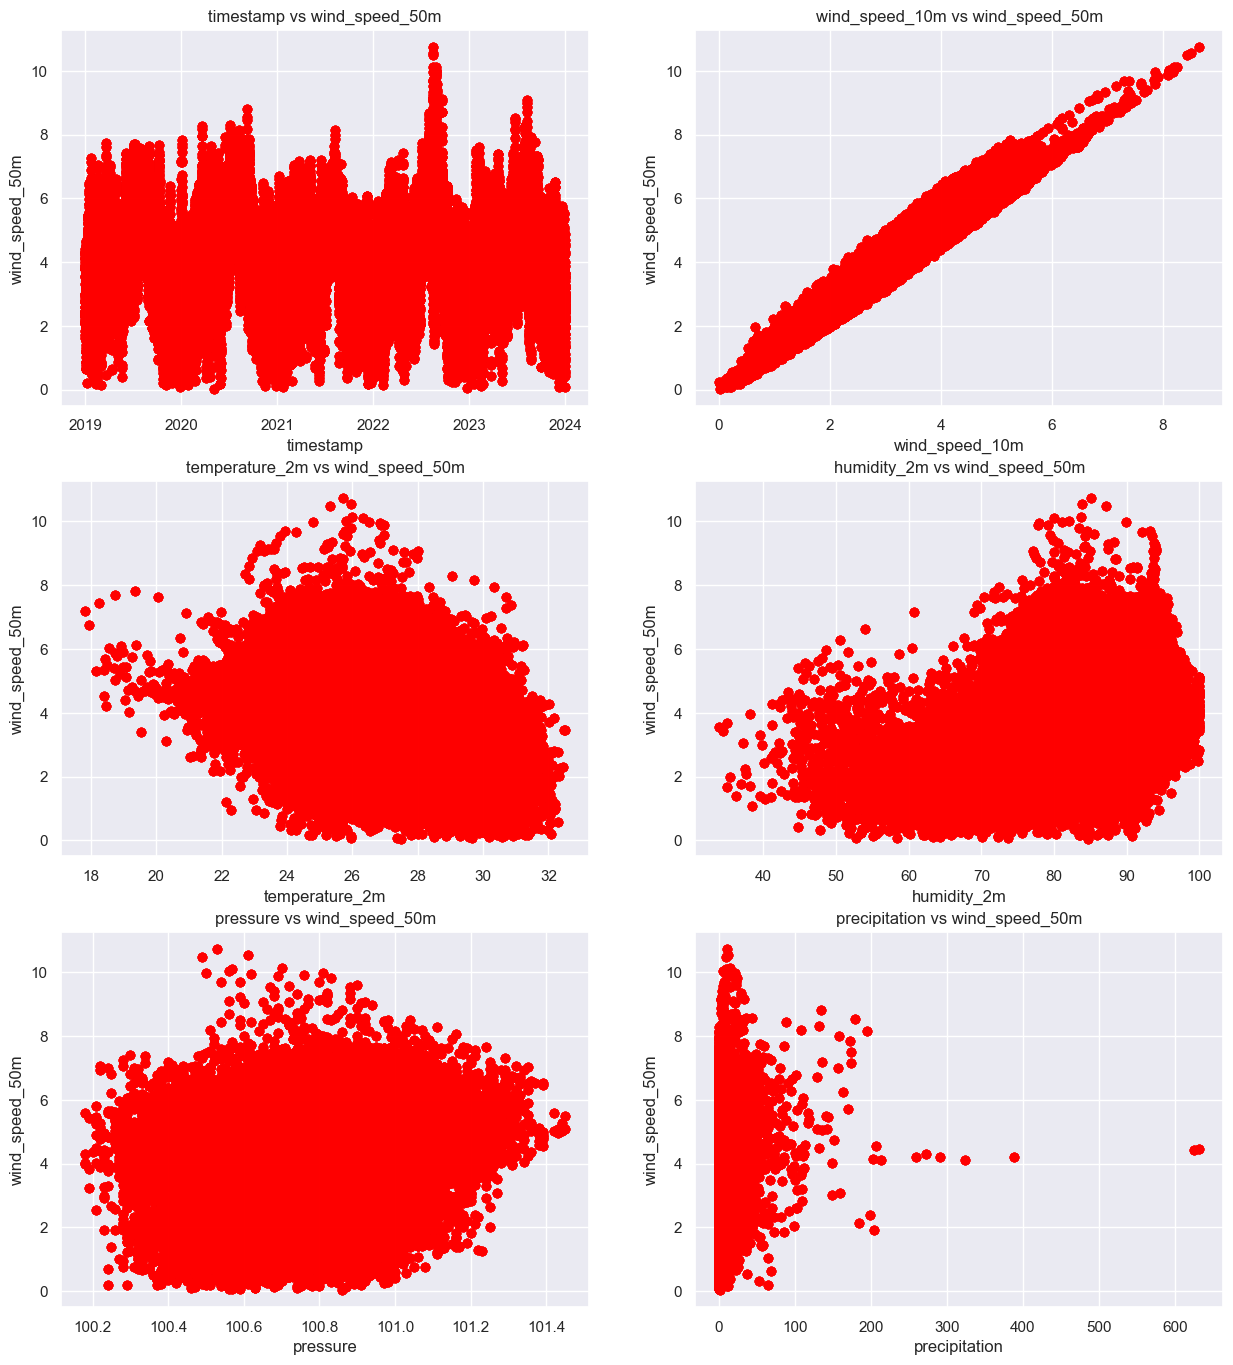

In [85]:
# Distribution des autres paramètres météorologique par rapport à la vitesse à 50m
plt.figure(figsize=(15, 40))
sns.set()
j = 0
for i in range(len(colonne)):
    if (colonne[i] == "wind_speed_50m"):
        continue
    plt.subplot(len(colonne), 2, j+1)
    plt.scatter(df[colonne[i]], df["wind_speed_50m"], c="red", alpha=0.8)
    plt.xlabel(f"{colonne[i]}")
    plt.ylabel("wind_speed_50m")
    plt.title(f'{colonne[i]} vs wind_speed_50m')
    j = j+1

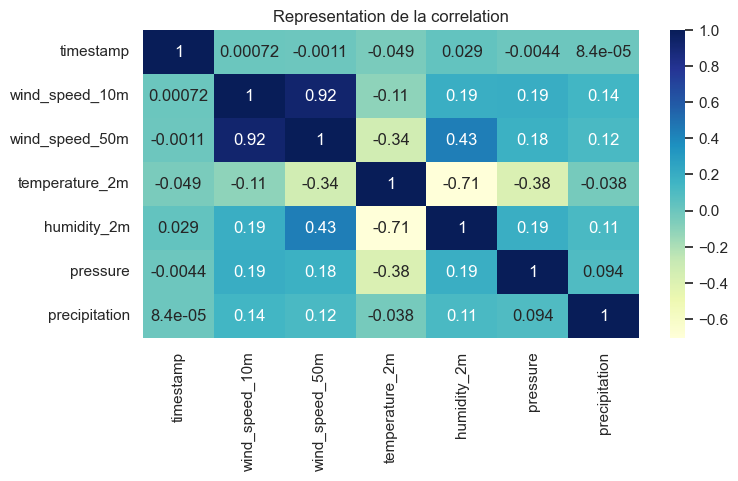

In [ ]:
# Etude de la relation linéaire entre les parramètres.
matrice_corr = [[0 for i in range(len(colonne))] for j in range(len(colonne))]
for i in range(len(colonne)):
    for j in range(len(colonne)):
        matrice_corr[i][j] = df[colonne[i]].corr(df[colonne[j]])

# Representation de carte de charleur
matrice_corr = np.array(matrice_corr)

plt.figure(figsize=(8, 4))
sns.heatmap(matrice_corr, annot=True, xticklabels=colonne, yticklabels=colonne, cmap='YlGnBu')
plt.title('Representation des correlation')
plt.show()

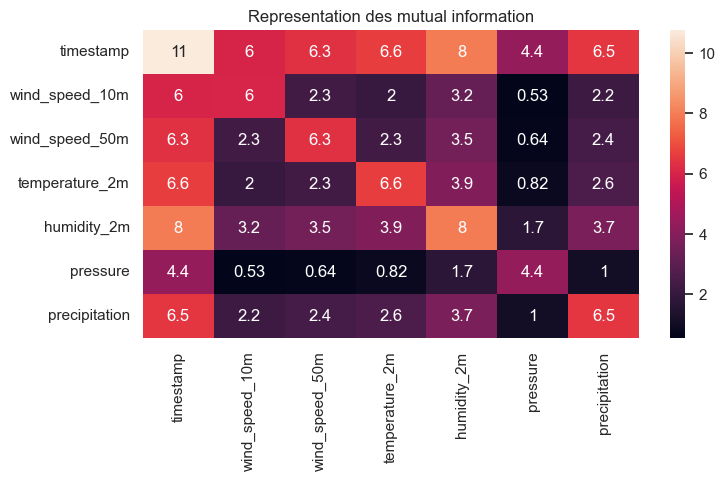

In [76]:
# Etude de la relation non linéaire entre les parramètres.
matrice_mutual = [[0 for i in range(len(colonne))] for j in range(len(colonne))]
for i in range(len(colonne)):
    for j in range(len(colonne)):
        matrice_mutual[i][j] = mutual_info_regression(np.array(df[colonne[i]]).reshape(-1, 1), np.array(df[colonne[j]]))

# Representation de carte de charleur
matrice_mutual = np.array(matrice_mutual).squeeze()

plt.figure(figsize=(8, 4))
sns.heatmap(matrice_mutual, annot=True, xticklabels=colonne, yticklabels=colonne)
plt.title('Representation des mutual information')
plt.show()

- Il n'y as aucune relation linéaire entre la vistesse à 50m et les autres paramètres excepté la vitesse à 10m où on constate une forte relation linéaie. En plus, on note aucune relation linéaire entre les paramètres deux à deux.

# Courbe de puissance

In [ ]:
# Estimation de la puissance grâce à la Courbe de puissance de Enercon E48/800
df_curve_power = pd.read_csv("courbe_puissance.csv")

# interpolation de la courbe de puissance
power_curve = interp1d(df_curve_power["wind_speed"], df_curve_power["power"], bounds_error=False, fill_value=0)

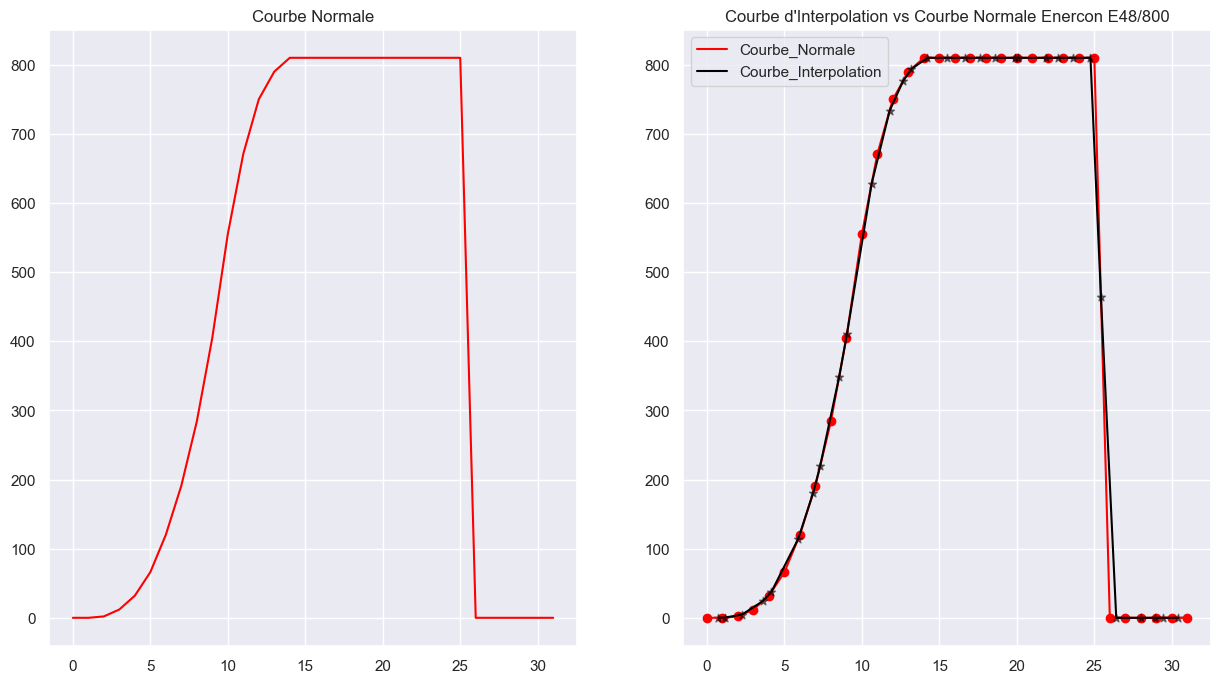

In [80]:
#  Comparaisont entre les courbes de puissance 
winds_x = [_+rd.random() for _ in range(31)]
# Apres interpolation
winds_x = pd.DataFrame({
    "winds_x": [_+rd.random() for _ in range(31)]
})
power_y = winds_x["winds_x"].apply(power_curve)

plt.figure(figsize=(15, 8))
sns.set()
plt.subplot(1, 2, 1)
plt.plot(df_curve_power["wind_speed"], df_curve_power["power"], label="Courbe_Normale", c="red")
plt.title("Courbe de puissance Normale")

plt.subplot(1, 2, 2)
plt.plot(df_curve_power["wind_speed"], df_curve_power["power"], label="Courbe_Normale", c="red")
plt.scatter(df_curve_power["wind_speed"], df_curve_power["power"], c="red", marker="o")
plt.plot(winds_x, power_y, label="Courbe_Interpolation", c="black")
plt.scatter(winds_x, power_y, c="black", marker="*", alpha=0.5)
plt.title("Courbe d'Interpolation vs Courbe Normale Enercon E48/800")
plt.legend()
plt.show()